# Boundary time crystals

Notebook author: Nathan Shammah (nathan.shammah at gmail.com)

We apply the Permutational Invariant Quantum Solver (PIQS) [1], imported in QuTiP as $\texttt{qutip.piqs}$ to the study of the following driven-dissipative dynamics
\begin{eqnarray}
\dot{\rho} = \mathcal{D}_\text{TLS}(\rho) &=& 
-\frac{i}{\hbar}\lbrack H,\rho \rbrack
+\frac{\gamma_\text{CE}}{2}\mathcal{L}_{J_{-}}[\rho]
\nonumber\\
&&+\sum_{n=1}^{N}\left(
\frac{\gamma_\text{E}}{2}\mathcal{L}_{J_{-,n}}[\rho]
+\frac{\gamma_\text{D}}{2}\mathcal{L}_{J_{z,n}}[\rho]\right)
\end{eqnarray}

where $J_{\alpha,n}=\frac{1}{2}\sigma_{\alpha,n}$ are SU(2) Pauli spin operators, with ${\alpha=x,y,z}$ and $J_{\pm,n}=\sigma_{\pm,n}$. The collective spin operators are $J_{\alpha} = \sum_{n}J_{\alpha,n}$. The Lindblad super-operators are $\mathcal{L}_{A} = 2A\rho A^\dagger - A^\dagger A \rho - \rho A^\dagger A$.

Here the rates $\gamma_\text{CE}$ (gCE), $\gamma_\text{E}$ (gE) and $\gamma_\text{D}$ quantify collective emission, local emission and local dephasing. 

Here we study the Hamiltonian $H=\hbar\omega_x J_x$, which has been studied in the context of quantum optics in Refs. [2,3].

The collective driven-dissipative dynamics has been studied in the regime $\gamma_\text{E}=\gamma_\text{D}=0$ and in the context of quantum phase transitions (QPTs) in Ref. [4].

Below we will study the spectrum of the Liouvillian [5] in the two parameter regimes found in Ref. [4], that of strong and of weak dissipation. If only collective processes are present, one can efficiently study the system's dynamics in the reduced symmetric space, whose Hilbert space dimension is only (N+1). We will do so using QuTiP's jmat() functions [6]. 

We then generalize the study of the collective dynamics to include local terms. 

In [2]:
from scipy.io import mmwrite
import matplotlib.pyplot as plt

from qutip import *
from qutip.piqs import *
import numpy as np

## Spectrum of the Liouvillian - Strong dissipation limit  $\omega_{0} = 0.5 \kappa $

In [3]:
nnn = 10
N = nnn
jj_mat = nnn/2
[jx_mat, jy_mat, jz_mat] = jmat(jj_mat)
jp_mat = jx_mat + 1j * jy_mat
jm_mat = jx_mat - 1j * jy_mat

In [4]:
w0 = 1
kappa = 2 * w0 
gg = kappa/ jj_mat
ham = w0 * jx_mat
c_ops = [np.sqrt(gg) * jm_mat]
liouv_mat = liouvillian(ham, c_ops)

In [5]:
print(liouv_mat.shape)
eig_mat = liouv_mat.eigenenergies()
re_eigmat = np.real(eig_mat)
imag_eigmat = np.imag(eig_mat)

(121, 121)


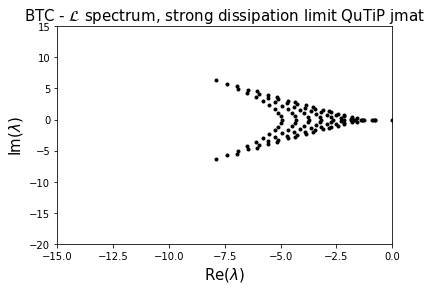

In [6]:
fig6 = plt.figure(6)
plt.plot(re_eigmat/kappa, imag_eigmat/kappa, 'k.')
label_size = 15
label_size2 = 15
label_size3 = 15
plt.rc('text', usetex = True)
plt.title(r'BTC - $\mathcal{L}$ spectrum, strong dissipation limit QuTiP jmat',
          fontsize = label_size2)

plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

plt.ylim([-20,15])
plt.xlim([-15,0])

plt.xlabel(r'$\mathrm{Re}(\lambda)$', fontsize = label_size3)
plt.ylabel(r'$\mathrm{Im}(\lambda)$', fontsize = label_size3)

fname = 'figures/btc_eig_N{}_strong_jmat.pdf'.format(N)
savefile = False
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.show()
plt.close()


In [7]:
#Saving for Mathematica
liouvd_jmat =liouv_mat.full()
liouvd_re_jmat = np.real(liouvd_jmat)
liouvd_imag_jmat = np.imag(liouvd_jmat)
#saveto_file_name2 = str("re_liouv_N={}".format(N))
#liouvd_re.astype('float32').tofile('{}.dat'.format(saveto_file_name2))
#saveto_file_name3 = str("imag_liouv_N={}".format(N))
#liouvd_imag.astype('float32').tofile('{}.dat'.format(saveto_file_name3))
#mmwrite('data/liouvrejmat.mtx', liouvd_re_jmat/kappa)
#mmwrite('data/liouvimjmat.mtx', liouvd_imag_jmat/kappa)

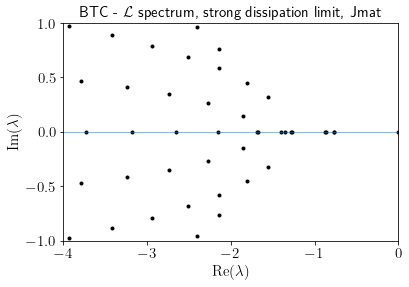

In [8]:
fig7 = plt.figure(7)
plt.plot(re_eigmat/kappa, imag_eigmat/kappa, 'k.', re_eigmat/kappa, 0*imag_eigmat/kappa, '-', lw = 0.5)
label_size = 15
label_size2 = 15
label_size3 = 15
plt.title(r'BTC - $\mathcal{L}$ spectrum, strong dissipation limit, Jmat', fontsize = label_size2)

plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

plt.ylim([-1,1])
plt.xlim([-4,0])


plt.xlabel(r'$\mathrm{Re}(\lambda)$', fontsize = label_size3)
plt.ylabel(r'$\mathrm{Im}(\lambda)$', fontsize = label_size3)

fname = 'figures/btc_eig_inset_N{}_strong_jmat.pdf'.format(N)
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.show()
plt.close()

The Figure above reproduces qualitatively the study performed in Ref. [4].

## Spectrum of the Liouvillian - Weak dissipation limit  $\omega_{0} = 1.5 \kappa $

In [9]:
nnn = 36
N = nnn
jj_mat = nnn/2
[jx_mat, jy_mat, jz_mat] = jmat(jj_mat)
jp_mat = jx_mat + 1j * jy_mat
jm_mat = jx_mat - 1j * jy_mat
w0 = 1
kappa = 2/3 * w0 
gg = kappa/ jj_mat
ham = w0 * jx_mat
c_ops = [np.sqrt(gg) * jm_mat]
liouv_mat = liouvillian(ham, c_ops)

In [10]:
print(liouv_mat.shape)
eig_mat = liouv_mat.eigenenergies()
re_eigmat = np.real(eig_mat)
imag_eigmat = np.imag(eig_mat)

(1369, 1369)


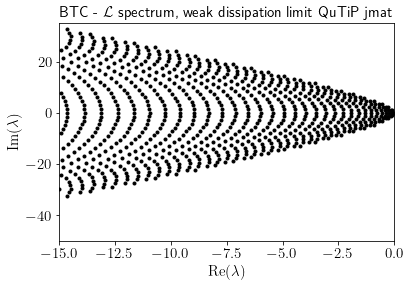

In [11]:
fig8 = plt.figure(8)
plt.plot(re_eigmat/kappa, imag_eigmat/kappa, 'k.')
label_size = 15
label_size2 = 15
label_size3 = 15
plt.rc('text', usetex = True)
plt.title(r'BTC - $\mathcal{L}$ spectrum,  weak dissipation limit QuTiP jmat', fontsize = label_size2)

plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

plt.ylim([-50,35])
plt.xlim([-15,0])

plt.xlabel(r'$\mathrm{Re}(\lambda)$', fontsize = label_size3)
plt.ylabel(r'$\mathrm{Im}(\lambda)$', fontsize = label_size3)

fname = 'figures/btc_eig_N{}_weak_jmat.pdf'.format(N)
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.show()
plt.close()

The Figure above reproduces qualitatively the study performed in Ref. [4].

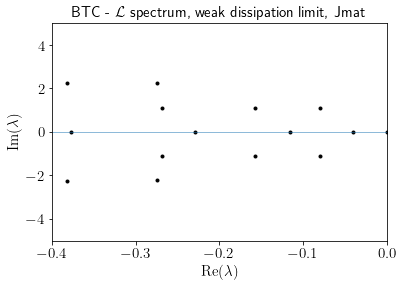

In [12]:
fig9 = plt.figure(9)
plt.plot(re_eigmat/kappa, imag_eigmat/kappa, 'k.', re_eigmat/kappa, 0*imag_eigmat/kappa, '-', lw = 0.5)
label_size = 15
label_size2 = 15
label_size3 = 15
plt.title(r'BTC - $\mathcal{L}$ spectrum, weak dissipation limit, Jmat', fontsize = label_size2)

plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

plt.ylim([-5,5])
plt.xlim([-0.4,0])

plt.xlabel(r'$\mathrm{Re}(\lambda)$', fontsize = label_size3)
plt.ylabel(r'$\mathrm{Im}(\lambda)$', fontsize = label_size3)

fname = 'figures/btc_eig_inset_N{}_weak_jmat.pdf'.format(N)
if savefile == True:    
    plt.savefig(fname, bbox_inches='tight')
plt.show()
plt.close()

The Figure above reproduces qualitatively the study performed in Ref. [4].

# Time evolution of collective operators, such as $\langle J_z (t)\rangle$

In [13]:
N = 20
ntls = N
nds = num_dicke_states(N)
print("System size: N = ", N, "| nds = ", nds,  "| nds^2 = ", nds**2,   "| 2^N = ", 2**N)
[jx, jy, jz] = jspin(N)
jp = jspin(N, "+")
jm = jp.dag()
jpjm = jp*jm

System size: N =  20 | nds =  121 | nds^2 =  14641 | 2^N =  1048576


In [14]:
w0 = 1
kappa = 0.5 * w0
gCE = 2*kappa/N
gE = 0
gP = 0
gCD = 0
gCP = 0
h = w0 * jx

nt = 1001
td0 = kappa
tmax = 200 * td0
t = np.linspace(0, tmax, nt)
rho0 = dicke(N, N/2, N/2)

jzt_list = []
jpjmt_list = []
jz2t_list = []
gD_list = [0, 0.01, 0.1, 1]
for gD in gD_list:
    
    print(gD)
    system = Dicke(N=N)
    system.collective_emission = gCE
    system.emission = gE
    system.dephasing = gD
    system.pumping = gP
    system.collective_pumping = gCP
    system.collective_dephasing = gCD
    # energy / dynamics numerical
    system.hamiltonian = h
    liouv = system.liouvillian()
    result = mesolve(liouv, rho0, t, [], e_ops = [jz, jp*jm, jz*jz], options = Options(store_states=True))
    rhot = result.states
    jz_t = result.expect[0]
    jpjm_t = result.expect[1]
    jz2_t = result.expect[2]
    
    jzt_list.append(jz_t)
    jpjmt_list.append(jpjm_t)
    jz2t_list.append(jz2_t)
#    gD_list.append(gD)

0
0.01
0.1
1


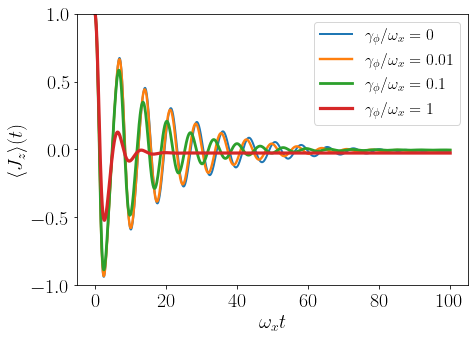

In [15]:
plt.rc('text', usetex = True)
label_size = 20
label_size2 = 20
label_size3 = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
lw = 1
i = 0
fig5 = plt.figure(figsize=(7,5))

for gD in gD_list:
    plt.plot(w0*t, jzt_list[i]/(N/2), '-', 
             label = r"$\gamma_\phi/\omega_x={}$".format(gD), linewidth = 2*lw+0.4*i)
    i = i+1
plt.ylim([-1,1])
#plt.title(r'Total inversion', fontsize = label_size2)
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J_z \rangle (t)$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.8)

plt.show()
plt.close()

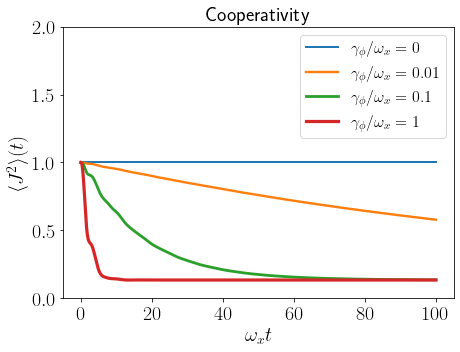

In [16]:
#cooperativity
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
fig8 = plt.figure(figsize=(7,5))
i=0
for gD in gD_list:
    plt.plot(w0*t, (jz2t_list[i] -jzt_list[i] + jpjmt_list[i])/((N/2*(N/2+1))), 
             '-', label = r"$\gamma_\phi/\omega_x={}$".format(gD), linewidth = 2*lw+0.4*i)
    i = i+1
plt.ylim([0,2.])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J^2 \rangle (t)$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.8)

plt.title(r'Cooperativity', fontsize = label_size2)
plt.show()
plt.close()

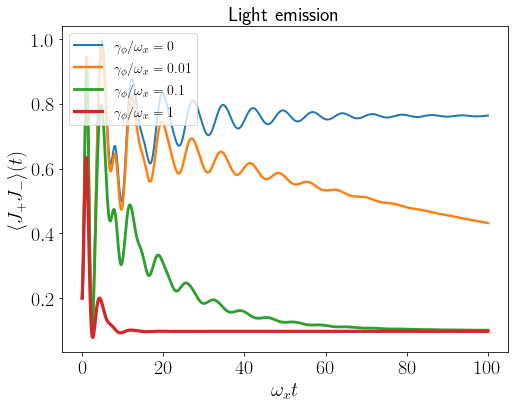

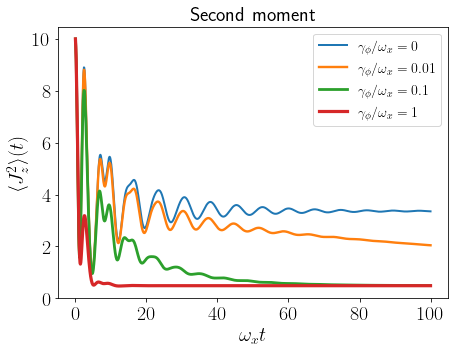

In [17]:
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)


fig6 = plt.figure(figsize=(8,6))
i=0
for gD in gD_list:
    plt.plot(w0*t, jpjmt_list[i]/(N/2)**2, label = r"$\gamma_\phi/\omega_x={}$".format(gD), linewidth = 2*lw+0.4*i)
    i = i+1
#plt.ylim([-1,1])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J_{+}J_{-} \rangle (t)$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.7)
plt.title(r'Light emission', fontsize = label_size2)
plt.show()
plt.close()

plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

fig7 = plt.figure(figsize=(7,5))
i=0
for gD in gD_list:
    plt.plot(w0*t, jz2t_list[i]/(N/2), '-', label = r"$\gamma_\phi/\omega_x={}$".format(gD), linewidth = 2*lw+0.4*i)
    i = i+1
#plt.ylim([-1,1])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J_z^2 \rangle (t)$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.7)
plt.title(r'Second moment', fontsize = label_size2)
plt.show()
plt.close()

In [18]:
# Study of local incoherent losses
N = 20
print(N)
w0 = 1
kappa = 0.5 * w0
gCE = 2*kappa /N
gE = 0
gP = 0
gD = 0
gCD = 0
gCP = 0
gD = 0
h = w0 * jx

nt = 1001
td0 = kappa
tmax = 200 * td0
t = np.linspace(0, tmax, nt)
rho0 = dicke(N, N/2, N/2)

jzt_list = []
jpjmt_list = []
jz2t_list = []
gE_list = [0, 0.01, 0.1, 1]
for gE in gE_list:
    print(gE)
    system = Dicke(N=N)
    system.collective_emission = gCE
    system.emission = gE
    system.dephasing = gD
    system.pumping = gP
    system.collective_pumping = gCP
    system.collective_dephasing = gCD
    # energy / dynamics numerical
    system.hamiltonian = h
    liouv = system.liouvillian()
    result = mesolve(liouv, rho0, t, [], e_ops = [jz, jp*jm, jz*jz], options = Options(store_states=True))
    rhot = result.states
    jz_t = result.expect[0]
    jpjm_t = result.expect[1]
    jz2_t = result.expect[2]
    
    jzt_list.append(jz_t)
    jpjmt_list.append(jpjm_t)
    jz2t_list.append(jz2_t)
#    gD_list.append(gD)

20
0
0.01
0.1
1


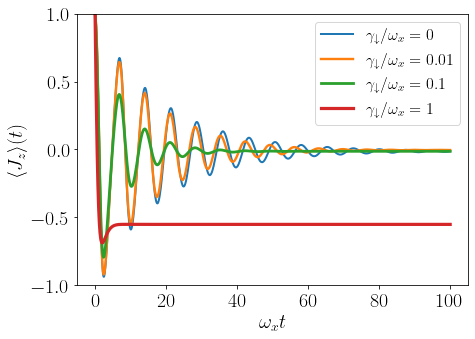

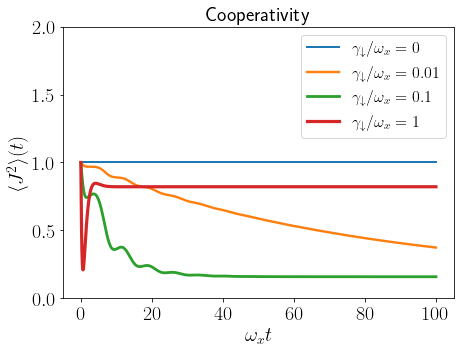

In [19]:
plt.rc('text', usetex = True)
label_size = 20
label_size2 = 20
label_size3 = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
lw = 1
i = 0
fig5 = plt.figure(figsize=(7,5))

for gD in gD_list:
    plt.plot(w0*t, jzt_list[i]/(N/2), '-', label = r"$\gamma_\downarrow/\omega_x={}$".format(gD), linewidth = 2*lw+0.4*i)
    i = i+1
plt.ylim([-1,1])
#plt.title(r'Total inversion', fontsize = label_size2)

plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J_z \rangle (t)$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.8)

fname = 'figures/btc_jzt_N{}_gE.pdf'.format(N)
if savefile == True:  
    plt.savefig(fname, bbox_inches='tight')
plt.show()
plt.close()

#cooperativity
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
fig8 = plt.figure(figsize=(7,5))
i=0
for gD in gD_list:
    plt.plot(w0*t, (jz2t_list[i] -jzt_list[i] + jpjmt_list[i])/((N/2*(N/2+1))), 
             '-', label = r"$\gamma_\downarrow/\omega_x={}$".format(gD), linewidth = 2*lw+0.4*i)
    i = i+1
plt.ylim([0,2.])
plt.xlabel(r'$\omega_x t$', fontsize = label_size3)
plt.ylabel(r'$\langle J^2 \rangle (t)$', fontsize = label_size3)
plt.legend(fontsize = label_size3*0.8)

plt.title(r'Cooperativity', fontsize = label_size2)
plt.show()
plt.close()

The plots above integrate the study on the effect of local dissipation performed in Ref. [1]. The boundary time crystals were introduced in Ref. [4]. A study of the effect of inhomogenous broadening (non-identical two level systems) is performed in Ref. [7] with regard to boundary time crystals and in Ref. [8] with regards to Dicke superradiance. 

#### References

[1] N. Shammah, S. Ahmed, N. Lambert, S. De Liberato, and F. Nori, 
Open quantum systems with local and collective incoherent processes: Efficient numerical simulation using permutational invariance https://arxiv.org/abs/1805.05129

The PIQS library can be found at https://github.com/nathanshammah/piqs/

[2] R. Bonifacio and L. A. Lugiato, Optical bistability and cooperative effects in resonance fluorescence, *Phys. Rev. A* **18**, 1129 (1978)

[3] S. Sarkar and J. S. Satchell, Optical bistability with small numbers of atoms, *Europhys. Lett.* **3**, 797 (1987)

[4] F. Iemini, A. Russomanno, J. Keeling, M. Schirò, M. Dalmonte, and R. Fazio, Boundary Time Crystals, arXiv:1708.05014 (2017)

[5] V. V. Albert and L. Jiang, Symmetries and conserved quantities in Lindblad master equations, *Phys. Rev. A* **89**, 022118 (2014)

[6] J.R. Johansson, P.D. Nation, and F. Nori, *Comp. Phys. Comm.* **183**, 1760 (2012) http://qutip.org

[7] K. Tucker, B. Zhu, R. Lewis-Swan, J. Marino, F. Jimenez, J. Restrepo, and A. M. Rey, arXiv:1805.03343 (2018)

[8] N. Lambert, Y. Matsuzaki, K. Kakuyanagi, N. Ishida, S. Saito, and F. Nori, *Phys. Rev. B* **94**, 224510 (2016).

In [20]:
qutip.about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman and Simon Cross.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      4.7.0.dev0+65abc14
Numpy Version:      1.21.0
Scipy Version:      1.6.2
Cython Version:     0.29.23
Matplotlib Version: 3.3.4
Python Version:     3.8.10
Number of CPUs:     4
BLAS Info:          OPENBLAS
OPENMP Installed:   False
INTEL MKL Ext:      False
Platform Info:      Linux (x86_64)
Installation path:  /home/chris/git/qutip/qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
